# **Data Analytics Challege**

## *José Max Barrios Lara*

### **Posición:** Analista Estrategia Experiencia de Clientes.


**Objetivo:** Este challenge tiene como objetivo poner a prueba la capacidad técnica del candidato. Las habilidades que demostrar son:




*   Capacidad en el manejo de datos no estructurados.
*   Manipulación de información y explotación de fuentes de datos externas o internas.
*   Presentación de la información.
*   La capacidad de reproducibilidad de los análisis.



**Challenge:** 
Vamos a construir un simple webscraper de Twitter y analizar que dice la gente de Panamá.
El candidato debe conectarse al API de Twitter y poder extraer 1,000 tweets relevantes que contengan la palabra ‘Panamá’ o información relevante con Panamá.

**Método de entrega:** 
El código debe ser entregado en un repositorio de GitHub en un Jupyter Notebook. Este Notebook debe tener como variable los access_key y secret_key del API de Twitter para poder ser reemplazos y replicado.


**NOTA:** Este cuaderno tiene la intención de poder ser mejor comprendido con comentarios, relacionado al código ejecutado, para la interpretación de cualquier persona técnica o no.


## **ANÁLISIS DE SENTIMIENTO**

Análisis de sentimientos: el proceso de identificar y categorizar computacionalmente las opiniones expresadas en un fragmento de texto, especialmente para determinar si la actitud del escritor hacia un tema, producto, etc. en particular, es positiva, negativa o neutral.


*   :)
*   :|
*   :(

Para realizar el análisis de sentimiento es importante identificar la **polaridad**.

**Polaridad:**
Opinión expresada en un documento, una oración o un rasgo/característica de una entidad es positiva, negativa, o neutra.

También en algunos casos se toma en cuenta la **subjetividad**

**Subjetividad:**
Es la percepción y valorización personal y parcial sobre un asunto, idea, pensamiento o cultura.

### **Twitter API**

El primer proceso para obtener datos de la API de Twitter es solicitar permisos de desarrollador en el sitio oficial de [twitter](https://developer.twitter.com/en)

Una ves obtenido los credenciales, debemos sustraer las llaves de autorización otorgadas para conectarse a la API.

In [ ]:
"Importando modulos"
import tweepy,re,json,matplotlib.pyplot as plt, seaborn as sns,pandas as pd,sys,datetime,numpy as np,io
from textblob import TextBlob
from google.colab import files
plt.style.use('fivethirtyeight')

In [ ]:
"""Definiendo Credenciales"""
consumer_key = ""
consumer_secret = ""
access_key = ""
secret_key = ""
autenticacion = tweepy.OAuthHandler(consumer_key, consumer_secret)
autenticacion.set_access_token(access_key, secret_key)
"""Variable donde voy a llamar a la API"""
api = tweepy.API(autenticacion, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### **Extracción de Datos en Ingles y Español**

Luego de conectarnos a la APi de Twitter, para nuestro enfoque personal Extraeremos:



*   Tweets en Inglés
*   Tweets en Castellano

Para Extraer diferente información y observar diferencias y similitudes en los dos análisis.

Los Datos fueron extraidos en ambos casos del: **2020-11-12** al **2020-11-2018**

El término a extraer es: **Panamá**


In [ ]:
"""Almacenar todos los resultados en la busqueda de la api que contengan el valor de Panama"""
term = 'Panamá'
#Vamos a solo devolver 1000 resultados  que contengan el termino que deseamos, se debe colocar en el campo: "since_id=" la fecha en la cual queremos empezar la búsqueda.
results = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-19').items(143)
json_data = [r._json for r in results]
df = pd.io.json.json_normalize(json_data)

results_dos = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-18').items(143)
json_data_dos = [r._json for r in results_dos]
df1 = pd.io.json.json_normalize(json_data_dos)

results_tres = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-17').items(143)
json_data_tres = [r._json for r in results_tres]
df2 = pd.io.json.json_normalize(json_data_tres)

results_cuatro = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-16').items(143)
json_data_tres = [r._json for r in results_cuatro]
df3 = pd.io.json.json_normalize(json_data_tres)

results_cinco = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-15').items(143)
json_data_cinco = [r._json for r in results_cinco]
df4 = pd.io.json.json_normalize(json_data_cinco)

results_seis = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-14').items(143)
json_data_seis = [r._json for r in results_seis]
df5 = pd.io.json.json_normalize(json_data_seis)

results_siete = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="en",until='2020-11-13').items(142)
json_data_siete = [r._json for r in results_siete]
df6 = pd.io.json.json_normalize(json_data_siete)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_norma

In [ ]:
#TWEETS EN ESPAÑOL
results_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-19').items(143)
json_data_es = [r._json for r in results_es]
df_es = pd.io.json.json_normalize(json_data_es)

results_dos_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-18').items(143)
json_data_dos_es = [r._json for r in results_dos_es]
df1_es = pd.io.json.json_normalize(json_data_dos_es)

results_tres_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-17').items(143)
json_data_tres_es = [r._json for r in results_tres_es]
df2_es = pd.io.json.json_normalize(json_data_tres_es)

results_cuatro_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-16').items(143)
json_data_tres_es = [r._json for r in results_cuatro_es]
df3_es = pd.io.json.json_normalize(json_data_tres_es)

results_cinco_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-15').items(143)
json_data_cinco_es = [r._json for r in results_cinco_es]
df4_es = pd.io.json.json_normalize(json_data_cinco_es)

results_seis_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-14').items(143)
json_data_seis_es = [r._json for r in results_seis_es]
df5_es = pd.io.json.json_normalize(json_data_seis_es)

results_siete_es = tweepy.Cursor(api.search, q='Panamá', tweet_mode="extended",lang="es",until='2020-11-13').items(142)
json_data_siete_es = [r._json for r in results_siete_es]
df6_es = pd.io.json.json_normalize(json_data_siete_es)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: pandas.io.json.json_normalize is

In [ ]:
"concatenando Dataframes"
df = pd.concat([df, df1, df2, df3, df4, df5, df6])
"Concatenando Dataframe en español"
df_es = pd.concat([df_es, df1_es, df2_es, df3_es, df4_es, df5_es, df6_es])

In [ ]:
#Descargando Archivo a Maquina Local en formato CSV
from google.colab import files
df.to_csv('TweetsChallenge_english.csv') 
files.download('TweetsChallenge_english.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Descargando CSV con tuits en Español
df_es.to_csv('TweetsChallenge_spanish.csv') 
files.download('TweetsChallenge_spanish.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Importando Datasets**

A partir de este punto comenzaremos a utilizar los datasets extraidos anteriormente.

## **ANÁLISIS PARA TWEETS EN EL IDIOMA INGLÉS**

In [ ]:
#Nuestro dataset contienen 352 columnas, observemos sus nombres
for columnNames in df.columns:
  print(columnNames)

created_at
id
id_str
full_text
truncated
display_text_range
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang
entities.hashtags
entities.symbols
entities.user_mentions
entities.urls
metadata.iso_language_code
metadata.result_type
user.id
user.id_str
user.name
user.screen_name
user.location
user.description
user.url
user.entities.description.urls
user.protected
user.followers_count
user.friends_count
user.listed_count
user.created_at
user.favourites_count
user.utc_offset
user.time_zone
user.geo_enabled
user.verified
user.statuses_count
user.lang
user.contributors_enabled
user.is_translator
user.is_translation_enabled
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_image_url
user.profile_image_url_https
user.profile_

## **COLUMNAS**

Del total de columnas utilizaremos las siguientes:



*   **Created_at:** Fecha de creación del tweet.
*   **Full_text:** Corpus del tweet.
*   **User.screen_name:** Nombre de usuario de quien posteo el tweet.






In [ ]:
#Seleccionamos las columnas deseadas, y creamos un nuevo dataframe donde solo se tenga la información de las columnas deseadas
tweeterDF = df[['created_at','full_text','user.screen_name']]
#renombrando columnas
tweeterDF.columns = ['created_at','full_text','screen_name']

## **ANÁLISIS EXPLORATORIO DE DATOS**

En esta sección se revisaran los datos como tal, como el tipo de datos, Número de Usuarios más activos entre otros.

In [ ]:
#Tipos de datos
tweeterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   861 non-null    object
 1   full_text    861 non-null    object
 2   screen_name  861 non-null    object
dtypes: object(3)
memory usage: 26.9+ KB


In [ ]:
#Cambiando el tipo de dato de objeto a fecha en columna created_at
tweeterDF['created_at'] = pd.to_datetime(tweeterDF['created_at'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


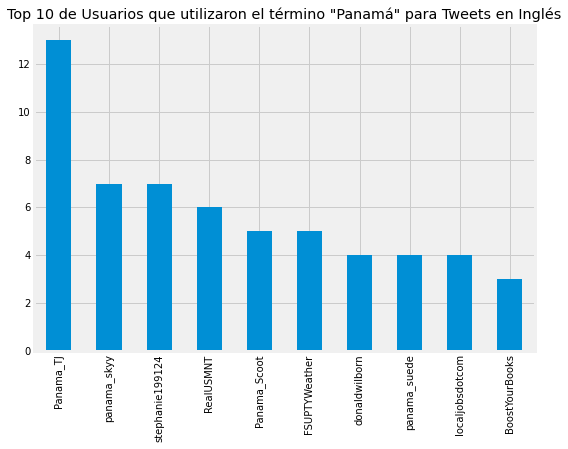

In [ ]:
#Lets only take the first 10 Users and plot it
import matplotlib.pyplot as plt
usersDF = tweeterDF['screen_name'].value_counts()
first_ten = usersDF.head(10)
plt.figure(figsize=(8,6))
plt.title('Top 10 de Usuarios que utilizaron el término "Panamá" para Tweets en Inglés')
first_ten.plot.bar()

## **REMOVIENDO CARACTERES ESPECIALES Y EMOJIS**

In [ ]:
#Creemos una funcion que nos permita elimiar caracteres inecesarios dentro del corpus de los tweets, con expresiones regulares
#Create a Function to clean text, La r es para decirle a python que son caracters raw
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'_','',text)
    text = re.sub(r'/','',text)
    text = re.sub(r'https://','',text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r':','',text)
    text = re.sub(r'[\n]','',text)
    text = re.sub(r'[|]','',text)
    text = re.sub(r'{','',text)
    text = re.sub(r'}','',text)
    text = re.sub(r'RT[\s]','',text)
    text = re.sub(r'[\n]','',text)
    text = re.sub(r',','',text)
    text = re.sub(r'@ ','',text)
    text = re.sub(r'!','',text)
    text = re.sub(r'¡','',text)
    text = re.sub(r'¿','',text)
    text = re.sub(r'""','',text)
    text = re.sub(r'-','',text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'httpst','',text)
    return text.lower()
 

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
#Apliquemos las funciones para limipiar el texto, y crear una nueva columna basada en el Corpus original
tweeterDF['cleanedTweet'] = tweeterDF['full_text'].astype('str').apply(cleanText)
tweeterDF['cleanedTweet'] = tweeterDF['cleanedTweet'].astype('str').apply(deEmojify)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### **Comparando WordClouds antes y despúes de ser limpiado el texto**

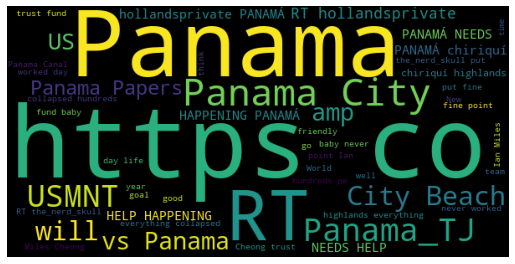

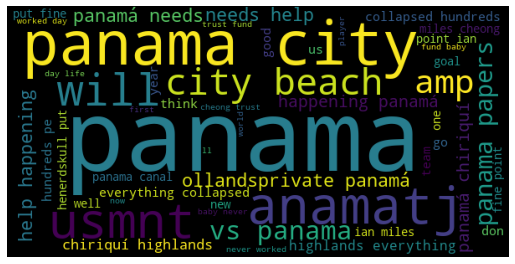

In [ ]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
allwords = ' '.join([twts for twts in tweeterDF['full_text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119,max_words=50).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

from wordcloud import WordCloud
import matplotlib.pylab as plt
allwords = ' '.join([twts for twts in tweeterDF['cleanedTweet']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119,max_words=50).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observación:** Se puede notar que en el primer Word-Cloud que esta basado en los tweets originales, existen palabras como **preposiciones**, o **RT**, o **HTTPS** que son palabras vacías que no nos sirven mucho para un análisis de sentimento.

En el segundo Word-cloud se puede observar que algunas de estas palabras vacias, y signos han sido borradas con exito, sin embargo, existen algunas Stop-Words (palabras que nos ayudan como conexión en un lenguaje que aún existen**

## **REMOVIENDO STOP WORDS, TOKENIZACION Y STEMMING COMPLEMENTADO CON WORD-CLOUD**

**Stop-Words:** Palabras más comunes que sirven como unión dentro de un idioma. Ejemplo: para, con, contra.

**Tokenización:** Proceso de partir oraciones en palabras. ejemplo: "Juan estaba corriendo por la pradera" --> 'juan', 'estaba', 'corriendo', 'por', 'la', 'pradera'.

**Stemming:** Reducción de palabras a su raiz ejemplo: coriendo --> correr.



In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
#Convertiremos a X Varias listas dentro de listas, para luego ser tokenizadas y stemmizadas (llevads a su raiz)
cleanWordsList = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in tweeterDF["cleanedTweet"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    cleanWordsList.append(tmp)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Revisando stop-words removidos para revisar.
print(stop_words)

{'were', 'then', 'myself', 'same', 'hadn', 'i', 'once', "won't", 'an', 'while', 'll', 'yours', 'do', "you're", 'over', 'before', 'yourself', 'such', 'has', 'didn', 'only', "wasn't", 'few', 'so', 'haven', 'itself', 'why', "shan't", 'themselves', "mustn't", 'himself', 'him', 've', "hasn't", 'further', "you'll", 'they', 'with', 'again', "shouldn't", "don't", 'isn', 'was', 'under', 'after', 'his', 'shan', 'to', 'been', 'if', 'of', 'through', "you've", 'ours', 'is', 's', "couldn't", 'in', 'shouldn', 'but', 'wasn', 'm', 'than', 'couldn', 'mightn', 'are', 'until', 'them', 'off', 'have', 'any', 'which', 'needn', 'won', 'your', 'me', 'here', 'own', 'wouldn', 'most', 'as', 'above', 'up', 'for', 'just', 'should', 'hers', 'on', 'its', 'against', 'no', 'during', 'you', 'not', 'about', 'what', 'did', 'herself', 'her', 'yourselves', 'who', 'both', 'very', 'their', 'where', 'these', 'can', 'out', "that'll", 'am', "mightn't", 'each', 'will', 'the', 'all', 'from', 'she', "should've", 't', "weren't", "ha

In [ ]:
#Lista de Palabras luego de remover stopwords, tokenizarlas y reducirlas a su raiz
# print(cleanWordsList) -- Imprimir en Caso de querer observar el dataset limpio

In [ ]:
#Transformado X a un array para luego transformarlo a Dataframe para que cada palabra quede en una columna
cleanWordsList
my_array = np.asarray(cleanWordsList)
tweetsCleaned = pd.DataFrame(my_array)
#Nombrando Columnas
tweetsCleaned.columns = ['cleanedTweet']

#creando funcion para eliminar comas y signos de corchetes
def bracket_coma_clean(text):
   text = re.sub(r'[^\w]', ' ', text)
   return text


#Aplicando Funcion
tweetsCleaned['cleanedTweet'] = tweetsCleaned['cleanedTweet'].astype(str).apply(cleanText)

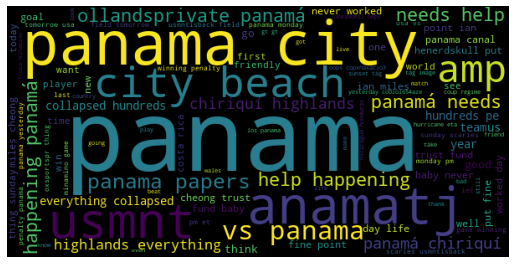

In [ ]:
#Wordcloud
from wordcloud import WordCloud
import matplotlib.pylab as plt
allwords = ' '.join([twts for twts in tweetsCleaned['cleanedTweet']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119,max_words=100).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Resultados:**

Podemos observar en este último Word-Cloud que no existen stop-words, y que las palabra más imporantes son Panamá, us, usmnt que es la cuenta de twitter del equipo de futbol mascúlino de los Estados Unidos entre otros.

### **Algoritmo TF-IDF**

Es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. [wikipedia](https://es.wikipedia.org/wiki/Tf-idf#:~:text=Tf%2Didf%20(del%20ingl%C3%A9s%20Term,un%20documento%20en%20una%20colecci%C3%B3n.)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Fitting TF-IDF
tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 300)
train_tv = tv.fit_transform(tweetsCleaned['cleanedTweet'])

## **Vocabulario**

realizamos un vocabulario con algunos terminos existen en los tweets.

In [ ]:
vocab = tv.get_feature_names()
print(vocab)

['10', '113', '12', '2020', '230', '230 pm', '230 pm et', '40', '40 panama', '50', '62', '90', 'affected', 'also', 'america', 'amp', 'anamatj', 'arrested', 'baby', 'baby never', 'baby never worked', 'back', 'bad', 'beach', 'bear', 'beat', 'berhalter', 'bolivia', 'buy', 'called', 'canal', 'central', 'change', 'cheong', 'cheong trust', 'cheong trust fund', 'child', 'child predators', 'chiriquí', 'chiriquí highlands', 'chiriquí highlands everything', 'city', 'city beach', 'climate', 'climate change bear', 'co0zol654aze', 'collapsed', 'collapsed hundreds', 'collapsed hundreds pe', 'colombia', 'concacaf', 'copxnaxacio3', 'costa', 'costa rica', 'could', 'countries', 'country', 'coup', 'coup regime', 'day', 'day life', 'dest', 'dynamite', 'en', 'et', 'eta', 'even', 'every', 'everything', 'everything collapsed', 'everything collapsed hundreds', 'fcusa', 'fcusa minamino', 'fcusa minamino game', 'field', 'field tomorrow', 'field tomorrow usa', 'fine', 'fine point', 'fine point ian', 'firm', 'fir

In [ ]:
import itertools,collections
# List of all words across tweets
all_words_counter = list(itertools.chain(*cleanWordsList))
# Create counter
commonWordCount = collections.Counter(all_words_counter)
print(commonWordCount.most_common(50))

[('panama', 582), ('city', 76), ('panamá', 70), ('usmnt', 55), ('anamatj', 53), ('us', 43), ('beach', 42), ('amp', 38), ('help', 36), ('like', 35), ('vs', 35), ('day', 31), ('game', 31), ('gt', 31), ('time', 29), ('see', 29), ('new', 28), ('needs', 28), ('life', 27), ('world', 27), ('happening', 27), ('canal', 26), ('people', 26), ('everything', 26), ('papers', 25), ('hundreds', 25), ('ollandsprivate', 25), ('highlands', 25), ('get', 24), ('put', 24), ('tomorrow', 24), ('honduras', 24), ('smnt', 24), ('chiriquí', 24), ('collapsed', 24), ('pe', 24), ('usa', 23), ('international', 22), ('monday', 22), ('penalty', 22), ('sunset', 21), ('first', 20), ('go', 20), ('good', 20), ('team', 20), ('hurricane', 19), ('ian', 19), ('miles', 19), ('trust', 19), ('never', 19)]


In [ ]:
#Creando DataFrame para luego graficar las 50 palabras que más se utilizarón
final_word_count = pd.DataFrame(commonWordCount.most_common(50),
                             columns=['palabras', 'conteo'])


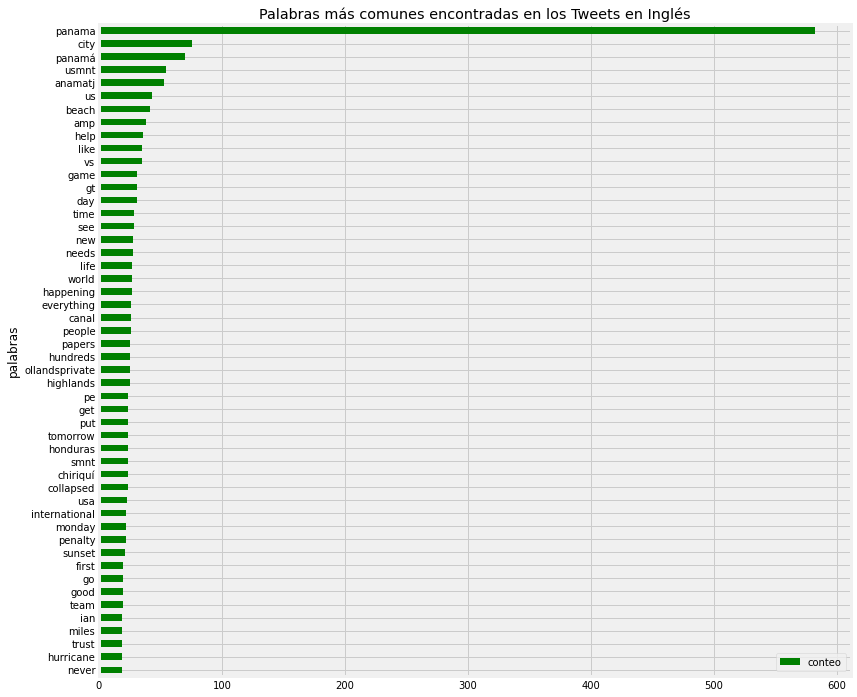

In [ ]:
#Gráfico de los 50 terminos que más se encuentran en los tweets en Inglés y su conteo
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
final_word_count.sort_values(by='conteo').plot.barh(x='palabras',
                      y='conteo',
                      ax=ax,
                      color="green")

ax.set_title("Palabras más comunes encontradas en los Tweets en Inglés")
plt.show()

## **Resultados:** 
Podemos observar entre los terminos que más se mencionan en los tweets en ingles basados en Panamá, estan algunos como:



*   usmnt (Cuenta de twitter de el equipo masculino de fútbol de Estados unidos)
*   hurricane
*   game
*   honduras
*   chiriquí
*   collapsed

Entre otros terminos, haciendo mayor incapie en terminos relacionados a el huracan eta, el partido entre USA y Panamá del día lunes, y algo de los panama papers.



## **LIBRERIA TEXTBLOB PARA ANÁLISIS DE SENTIMIENTO**

In [ ]:
#Create a function for subectivity
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a Function to get polarity despite that we have a column with that information
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns with that information
tweetsCleaned['Subjectivity'] = tweetsCleaned['cleanedTweet'].apply(getSubjectivity)
tweetsCleaned['Polarity'] = tweetsCleaned['cleanedTweet'].apply(getPolarity)
#Show the last 10
tweetsCleaned.head(5)

,cleanedTweet,Subjectivity,Polarity
0,well looks like spending week pana...,0.000000,0.000000
1,iklasastrand dude come panama refere...,0.644444,0.412121
2,mbbtv boil water notice issued muc...,0.200000,0.200000
3,mbbtv boil water notice issued muc...,0.200000,0.200000
4,boil water notice issued much pana...,0.200000,0.200000


In [ ]:
#Creando funcion para determinar la polaridad de los tweets
def getPolarity(polarity):
        if polarity == 0:
            return "Neutral"
        elif polarity > 0 and polarity <= 0.3:
            return "Debilmente Positivo"
        elif polarity > 0.3 and polarity <= 0.6:
            return "Positivo"
        elif polarity > 0.6 and polarity <= 1:
            return "Fuertement Positivo"
        elif (polarity > -0.3 and polarity <= 0):
            return "Debilmente Negativo"
        elif (polarity > -0.6 and polarity <= -0.3):
            return "Negativo"
        elif (polarity > -1 and polarity <= -0.6):
            return "Fuertemente Negativo"

In [ ]:
'''Creando Aplicando Funcion  a la columna de Polaridad y creando una nueva columna basada en esta'''
tweetsCleaned['PolarityCheck'] = tweetsCleaned['Polarity'].apply(getPolarity)
#Contando Cada uno de los valores
PolarityCheck = tweetsCleaned['PolarityCheck'].value_counts()
#Transformando a Dataframe
PolarityCheck = pd.DataFrame(PolarityCheck)

In [ ]:
#Creando un funcion más simple para dar una salida binaria, (positivo o negativo) para alimentar el algoritmo de logistic regression
def getAnalysis(score):
  if score >= 0:
    return  1
  elif score <0:
    return 0
    
  
#Create a new Column based on this
tweetsCleaned['BasicSentiment']= tweetsCleaned['Polarity'].apply(getAnalysis)

## **Regresión Lógistica y GridSearchCV**
GridSearchCV es una clase disponible  que permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.

En este caso utilizamos el algoritmo de regresión logistica para extraer los coeficientes de las palabras en nuestros textos, para visualizar cuales tienen una subjetividad positiva o negativa.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,KFold, StratifiedKFold
from sklearn.utils.multiclass import type_of_target

kfold = StratifiedKFold( n_splits = 5, random_state = 1 )
lr = LogisticRegression(random_state = 1,dual=True,solver='liblinear')

lr2_param = {
    'penalty':['l2'],
    'dual':[True],
    'C':[6],
    'class_weight':[{1:1}]
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(train_tv,tweetsCleaned['BasicSentiment'] )
print(lr_CV.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 6, 'class_weight': {1: 1}, 'dual': True, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


## **Coeficientes del Modelo**

Ya que hemos extraido con nuestro algoritmo TF-IDF una cantidad máxima de 300 terminos, vamos a visualizar 30 coeficientes positivos y 30 con coeficientes negativos.

El siguiente gráfico de barras muestra los 30 coeficientes más grandes y 30 más pequeños del modelo de regresión logística, con las barras que muestran el tamaño de cada coeficiente.

In [ ]:
#Tomando los coeficientes de palabras de textos
logi_best = lr_CV.best_estimator_
coefficients = logi_best.coef_
index = coefficients.argsort()
# Extract the feature names.
feature_names = np.array(tv.get_feature_names())

# From the smallest to largest.
feature_names[index][0][:30]

# feature names: Smallest 30 + largest 30.
feature_names_comb = list(feature_names[index][0][:30]) + list(feature_names[index][0][-31::1])

# coefficients magnitude: Smallest 30 + largest 30.
index_comb = list(coefficients[0][index[0][:30]]) + list(coefficients[0][index[0][-31::1]])

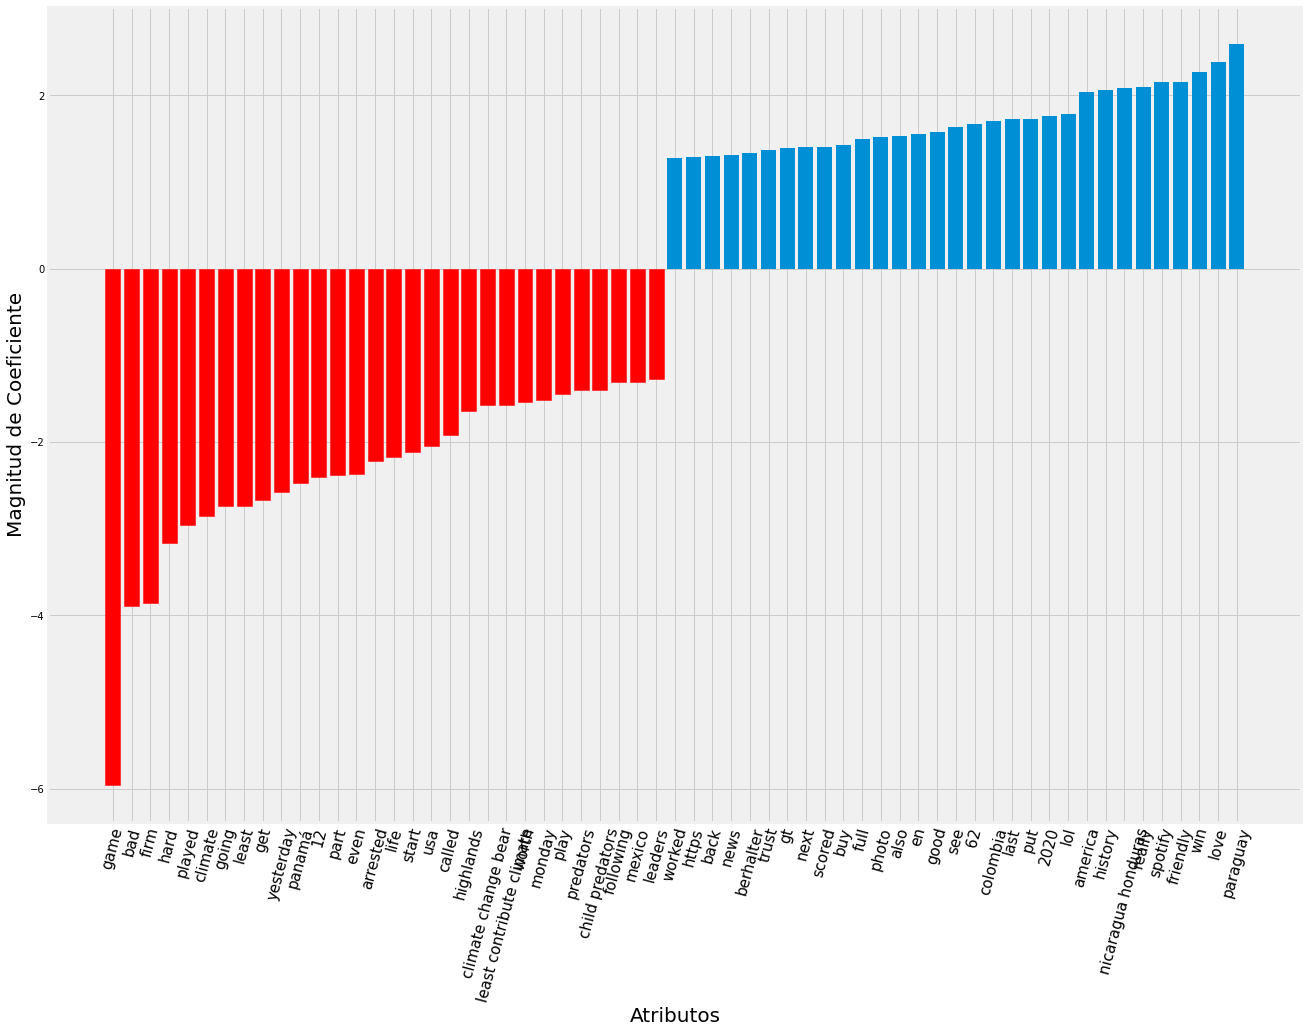

In [ ]:

# Make sure the x-axis be the number from 0 to the length of the features selected not the feature names.
# Once the bar is plotted, the features are placed as ticks.
plt.figure(figsize=(20,15))
barlist = plt.bar(list(i for i in range(61)), index_comb)
plt.xticks(list(i for i in range(61)),feature_names_comb,rotation=75,size=15)
plt.ylabel('Magnitud de Coeficiente',size=20)
plt.xlabel('Atributos',size=20)

# color the first smallest 30 bars red
for i in range(30):
    barlist[i].set_color('red')

plt.show()

**Resultados:**

La barra azul muestra térmninos relacionados a una polaridad positiva en el contenido de los textos, observamos palabras commo love, good, trust y en este caso asocian america y spotify con un coeficiente positivo. Por otra parte la barra roja indica términos relacionados con una polaridad negativa como bad, army, hard y asoscia palabras como eta (huracan), panamá como términos incluidos en textos negativos.

## **¿Existen Grupos dentro de estos tuits que escriben cosas parecidas?**

Las personas con caracteristicas similares tienden a asociarse, y a compartir información o escribir información parecida. Gracias al aprendizaje supervisado podemos encontrar estos grupos e identificar la información relacionada a que de 'Panamá'

In [ ]:
#Utilizaremos nuevamente el algoritmo TF-Idf
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 1000,
    stop_words = 'english'
)
tfidf.fit(tweetsCleaned.cleanedTweet)
text = tfidf.transform(tweetsCleaned.cleanedTweet)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


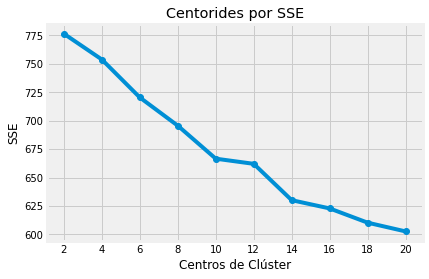

In [ ]:
#Encontremos el número ideal de grupos de personas que comparten información parecida
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(tweetsCleaned, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(text).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Centros de Clúster')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('Centorides por SSE')
    
find_optimal_clusters(text, 20)

**Observación:** Podemos observar

In [ ]:
#Elección de clusteres
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=9).fit_predict(text)

## **Palabras Compartidas por cada grupo encontrado (Tweets en  idioma Inglés)**

In [ ]:
#Function para encontrar "keywords" en distintos grupos
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 25)


Cluster 0
country,states,gioacchini,soto,oh,looking,men,hard,feel,week,player,teams,friendly,colombia,gregg,beat,vs,tunisia,coach,usmnt,berhalter,scoring,goals,panama,like

Cluster 1
20,2021,build,man,hurricane,yeah,2022,follow,design,night,image,based,iota,new,dj,getting,women,november,cargo,project,maybe,ship,panama,gt,canal

Cluster 2
wales,match,rfootball,reyna,think,miss,today,player,10,scored,japan,monday,win,friendly,vs,62,fcusa,co0zol654aze,winning,yesterday,penalty,minamino,panama,game,usmnt

Cluster 3
win,hope,run,video,actually,lost,come,tell,bank,called,yeah,new,ian,watch,know,far,wtf,bad,really,going,worth,buy,oh,btc,anamatj

Cluster 4
following,season,photo,october,ship,dj,people,en,international,need,watch,night,needs,smnt,2020,lol,north,chocinco,new,coq0etekcm0l,vfvf,played,help,link,panama

Cluster 5
hi,video,regime,bolivia,coup,th,important,play,ministers,figures,rturomurillos,erlopezjulio1,fled,awsachunnews,time,photo,near,panamá,friends,work,florida,hard,panama,cit

## **Resultados:**

Podemos visualizar con fácilidad que palabras claves son las que más han compartido por grupo y así visualizar o tener una idea de los temas que han sido tratados.

## **VISUALIZACIÓN DE DATOS**

### PCA - TSNE

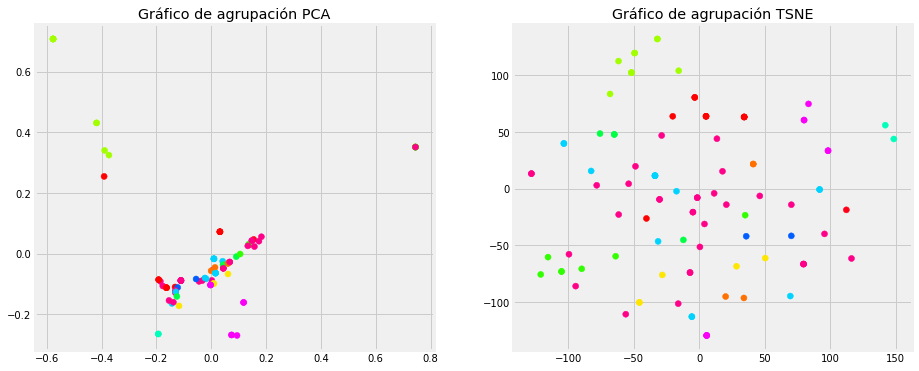

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
def plot_tsne_pca(X_train, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(X_train.shape[0]), size=100, replace=False)
    
    pca = PCA(n_components=2).fit_transform(X_train[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(X_train[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=True)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('Gráfico de agrupación PCA')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('Gráfico de agrupación TSNE')
    
plot_tsne_pca(train_tv, clusters)

**Resultados:**

Hemos realizado un grafico para observar grupos, pero como es visible debido a que los grupos escriben información bastante parecida, es bastante dificil que haya una separación de los mismos,  y estan bastante solapados.

### Scatterplot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Subjetividad vs Polaridad')

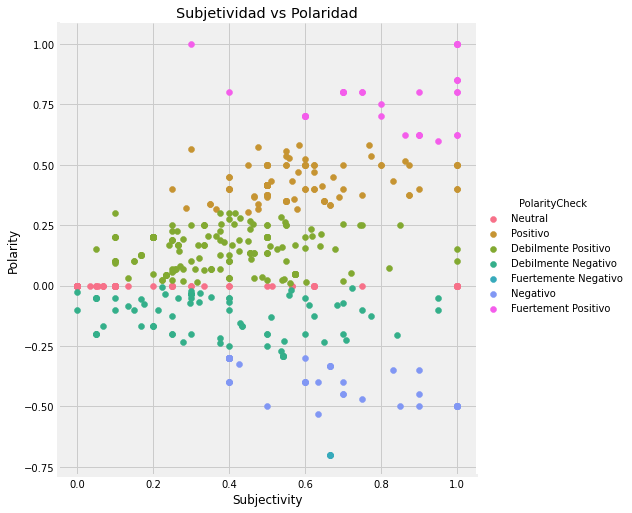

In [ ]:
#Scatterplot comparing sepals for each class
sns.FacetGrid(tweetsCleaned,hue='PolarityCheck',size=7).map(plt.scatter,'Subjectivity','Polarity').add_legend()
plt.title('Subjetividad vs Polaridad')

## **Resultados:**

Se puede observar que entre las medidas de subjetitivad y polaridad para los tweets con un sentimiento neutral dividen el sentimiento, y se puede notar que comparando el lado positivo y negativo existe una mayor tendencia a que los tweets tengan sentimiento **positivo**.


Vemos que en su mayoria los tweets son debilmente positivos o positivos seguidos por debilmente negativos. Los tweets fuertemente negativos son casi inexistentes, y los fuertemente positivos si es cierto que hay un poco más, tampoco son muy bastos.

Lo ideal será hacer un grafico de barras en donde se puedan contar los tweets por polaridad.

### Gráfico de Barras

-Con este gráfico podremos observar el conteo de Polaridad realizado, sumando cada una por tipo.

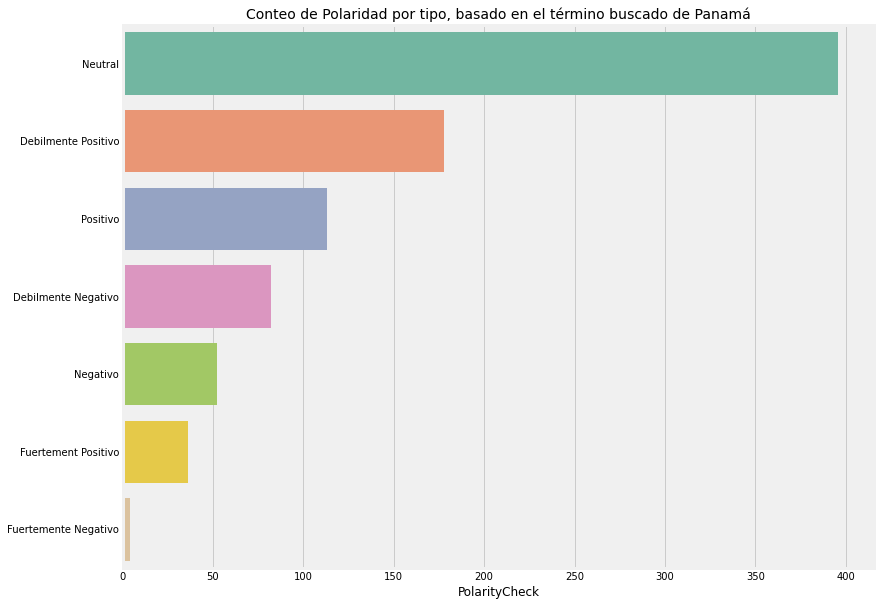

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Conteo de Polaridad por tipo, basado en el término buscado de '+ term, fontsize=14)
sns.barplot(data=PolarityCheck,x='PolarityCheck', y=PolarityCheck.index, palette='Set2')

## **Resultados:**

Podemos observar el conteo de los tweets por polaridad, y vemos lo que antes representaba el diagrama de dispersión (scatterpolot).

### Gráfico de Pastel

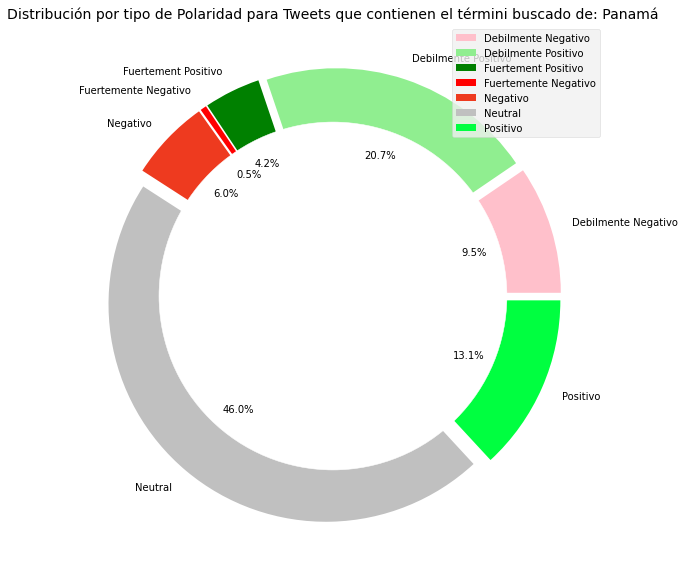

In [ ]:
modified = PolarityCheck.reset_index()
modified.columns = ['Polarity','ValueCount']
#agrupando por polaridad y sumando valores
data = modified.groupby("Polarity")['ValueCount'].sum()
#Gráfico de Barra para ver porcentajes
pie, ax = plt.subplots(figsize=[20,10])
labels = data.keys()
colors = ['pink','lightgreen','green','red','#ee3a1f','silver','#00FF40']
explode = [0.05, 0.05,0.05,0.05,0.05,0.05,0.05]
plt.pie(x=data, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.63,colors=colors)
plt.title("Distribución por tipo de Polaridad para Tweets que contienen el términi buscado de: "+term, fontsize=14);
my_circle = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

## **Resultados:**

Podemos observar que para tweets en Inglés Sacando los tweets Neutrales, Los tweets debilmente positivos y Negativos son mucho mayores, a los tweets negativos y debilmente negativos, lo que quiere decir que personas de habla inglesa, comparten más información positiva que contengan la palabra Panamá.

## **MODELO DE REDES NEURONALES RECURRENTES**

Es un tipo de red neuronal artificial que utiliza datos secuenciales o datos de series de tiempo.
Se distinguen por su "memoria", ya que toman información de entradas anteriores para influir en la entrada y salida actuales.

In [ ]:
!pip install keras

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
import random

In [ ]:
#Eligiremos un maximo de 200 atributos para ser extraidos
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(tweetsCleaned['cleanedTweet'].values)
X = tokenizer.texts_to_sequences(tweetsCleaned['cleanedTweet'])
X = pad_sequences(X)

In [ ]:
#Long-short term memory
embed_dim = 128
random.seed(30)
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 31, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 31, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Partición de datos
Y = pd.get_dummies(tweetsCleaned['BasicSentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(602, 31) (602, 2)
(259, 31) (259, 2)


In [ ]:
#Vamos a entrenar nuestro modelo
import time
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 6, batch_size=batch_size, verbose = 2,validation_data=(X_test,Y_test))

Epoch 1/6
19/19 - 3s - loss: 0.5667 - accuracy: 0.8140 - val_loss: 0.5307 - val_accuracy: 0.8378
Epoch 2/6
19/19 - 2s - loss: 0.4330 - accuracy: 0.8405 - val_loss: 0.4109 - val_accuracy: 0.8378
Epoch 3/6
19/19 - 2s - loss: 0.3343 - accuracy: 0.8488 - val_loss: 0.3556 - val_accuracy: 0.8649
Epoch 4/6
19/19 - 2s - loss: 0.2138 - accuracy: 0.9169 - val_loss: 0.2965 - val_accuracy: 0.8803
Epoch 5/6
19/19 - 2s - loss: 0.1118 - accuracy: 0.9651 - val_loss: 0.2826 - val_accuracy: 0.8842
Epoch 6/6
19/19 - 2s - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.2847 - val_accuracy: 0.8842


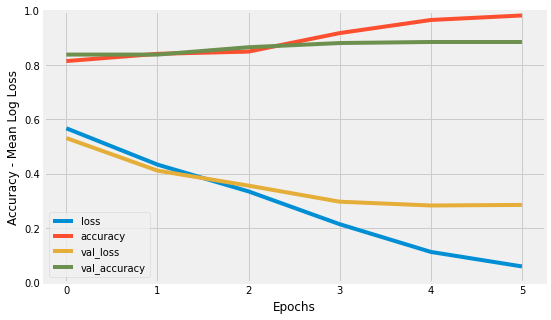

In [ ]:

results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
results[-1:]

,loss,accuracy,val_loss,val_accuracy
5,0.058372,0.981728,0.284722,0.88417


In [ ]:
#Predicciones para el conjunto de test
dev_predictions=model.predict(X_test).round(2)

In [ ]:
#Predicciones redondeadas
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
#Predicciones que han coincidido o no con la variable objetivo.
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(Y_test,1))
print (dev_correct_predictions[:30])

[False  True  True  True  True  True False  True  True False  True False
  True  True False False  True False  True  True  True  True False  True
  True  True  True  True  True  True]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


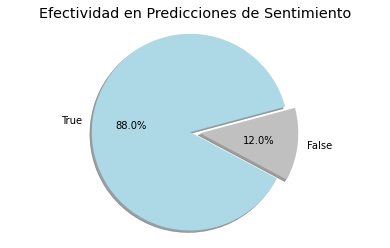

In [ ]:
#Observando el porcentaje de Acierto en las predicciones
from collections import Counter
Counter (dev_correct_predictions)
predictions = pd.DataFrame(dev_correct_predictions)
predictions.columns = ['predictions']
predictions = predictions['predictions'].value_counts()
predictions.columns = ['predictions','PredictionsSum']
predictions = pd.DataFrame(predictions)


my_labels = 'True','False'
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)
plt.pie(predictions, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Efectividad en Predicciones de Sentimiento')
plt.axis('equal')
plt.show()

### **Resultados:**

Más del 87% de nuestras predicciones de sentimiento han coincidido con la variable objetivo, por lo que es un porcentaje bastante acertado a nuestro análisis.

In [ ]:
#Reporte de Clasificación
from sklearn.metrics import classification_report
print(classification_report(Y_test,dev_rounded_predictions))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54        42
           1       0.90      0.97      0.93       217

   micro avg       0.88      0.88      0.88       259
   macro avg       0.81      0.70      0.73       259
weighted avg       0.87      0.88      0.87       259
 samples avg       0.88      0.88      0.88       259



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

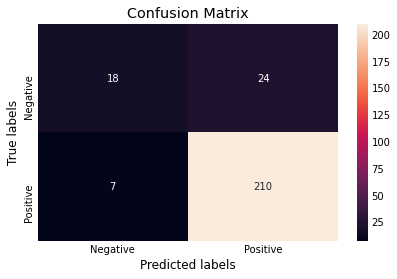

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test.argmax(axis=1), dev_predictions.argmax(axis=1))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

#**Sección 2:**

Análisis de sentimientos para tweets con textos en español.

# **ANÁLISIS DE SENTIMIENTO PARA TWEETS EN ESPAÑOL**

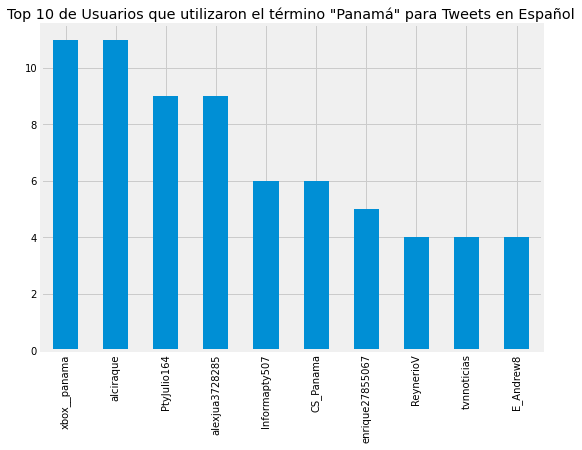

In [ ]:
#Encontremos los 10 Usuarios que más han escritos textos en twitter que contengan la palabra "Panamá"
import matplotlib.pyplot as plt
usersDF_es = df_es['user.screen_name'].value_counts()
first_ten_es = usersDF_es.head(10)
plt.figure(figsize=(8,6))
plt.title('Top 10 de Usuarios que utilizaron el término "Panamá" para Tweets en Español')
first_ten_es.plot.bar()

In [ ]:
#Seleccionamos las columnas deseadas, y creamos un nuevo dataframe donde solo se tenga la información de las columnas deseadas
df_es = df_es[['created_at','full_text','user.screen_name']]
#renombrando columnas
df_es.columns = ['created_at','full_text','screen_name']

## **Limpieza de Datos, Remover Stop Words - Stemming - Tokenización**

In [ ]:
#Apliquemos las funciones para limipiar el texto, y crear una nueva columna basada en el Corpus original
df_es['cleanedTweet'] = df_es['full_text'].astype('str').apply(cleanText)
df_es['cleanedTweet'] = df_es['cleanedTweet'].astype('str').apply(deEmojify)

In [ ]:
df_es.head(7)

,created_at,full_text,screen_name,cleanedTweet
0,Wed Nov 18 23:59:55 +0000 2020,RT @Pandeportes: Preocupados por el estado de ...,Fadiletant,andeportes preocupados por el estado de salud ...
1,Wed Nov 18 23:59:50 +0000 2020,@EstrellaOnline @CS_Panama REALIDAD CRÍTICA. E...,antonioads1949,strellaonline spanama realidad crítica el est...
2,Wed Nov 18 23:59:50 +0000 2020,"El sobresaliente desempeño de BAC Credimatic, ...",LaTribunahn,el sobresaliente desempeño de bac credimatic e...
3,Wed Nov 18 23:59:45 +0000 2020,RT @esdemontero: Migrantes venezolanos por Ciu...,taliban2214,sdemontero migrantes venezolanos por ciudad ...
4,Wed Nov 18 23:59:39 +0000 2020,RT @VTVcanal8: #EnVideo📹| Presidente de Venezu...,MariaGa24207507,tvcanal8 envideo presidente de venezuela icol...
5,Wed Nov 18 23:59:29 +0000 2020,RT @VTVcanal8: #EnVideo📹| Presidente de Venezu...,AAlejandramgs26,tvcanal8 envideo presidente de venezuela icol...
6,Wed Nov 18 23:59:28 +0000 2020,RT @Lechuguinos_com: ¡BIENVENIDOS A CASA! Plan...,afrolat,echuguinoscom bienvenidos a casa plan vuelta a...


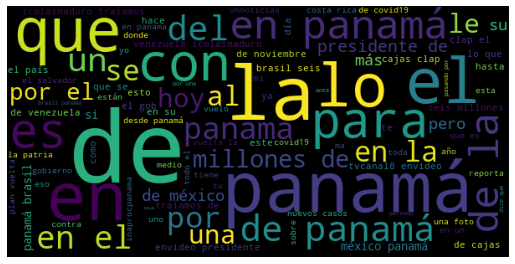

In [ ]:
#Wordcloud
from wordcloud import WordCloud
import matplotlib.pylab as plt
allwords = ' '.join([twts for twts in df_es['cleanedTweet']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119,max_words=100).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Podemos observar el WordCloud de Tweets en Español sin remover stop-words, stemming etc.

In [ ]:
#Convertiremos a X Varias listas dentro de listas, para luego ser tokenizadas y stemmizadas (llevads a su raiz)
cleanWordsList_es = []
stop_words_es = set(nltk.corpus.stopwords.words("spanish"))
tokenizer_es = nltk.tokenize.RegexpTokenizer(r'\w+')
for par_es in df_es["cleanedTweet"].values:
    tmp_es = []
    sentences_es = nltk.sent_tokenize(par_es)
    for sent_es in sentences_es:
        sent_es = sent_es.lower()
        tokens_es = tokenizer_es.tokenize(sent_es)
        filtered_words_es = [w_es.strip() for w_es in tokens_es if w_es not in stop_words_es and len(w_es) > 1]
        tmp_es.extend(filtered_words_es)
    cleanWordsList_es.append(tmp_es)

In [ ]:
#Observar sstop words removidas en español 
print(stop_words_es)

{'nos', 'habréis', 'hubieses', 'tuya', 'ni', 'entre', 'esas', 'estábamos', 'vuestras', 'otra', 'de', 'estaremos', 'estaban', 'estuvo', 'fue', 'ellos', 'estarían', 'fuisteis', 'tuviese', 'estuviéramos', 'estuvieses', 'son', 'hubiésemos', 'estas', 'eras', 'también', 'os', 'estarán', 'algunas', 'estaré', 'estaría', 'has', 'poco', 'hayamos', 'hubiese', 'éramos', 'tuvieseis', 'tenga', 'les', 'tuviésemos', 'durante', 'seas', 'estos', 'suyos', 'el', 'estás', 'habrá', 'suyo', 'habidos', 'mías', 'sus', 'habíais', 'seríais', 'por', 'mío', 'estuvierais', 'teniendo', 'sean', 'eran', 'estuve', 'le', 'hayan', 'estado', 'sintiendo', 'seré', 'tenida', 'hubieras', 'seáis', 'tened', 'tenía', 'tienen', 'una', 'tendrías', 'tenido', 'esto', 'sin', 'yo', 'con', 'habías', 'ti', 'tuve', 'teníamos', 'teníais', 'tenidas', 'que', 'estuviera', 'quien', 'tengamos', 'tenemos', 'tenidos', 'tus', 'estés', 'habríais', 'tuyos', 'sería', 'otras', 'sea', 'hubieron', 'habida', 'tengas', 'del', 'míos', 'fueseis', 'habrás',

In [ ]:
#Imprimimos las listas de palabras que han resultado luego de eliminar las stopwords, y pasar por el proceso de stemming.
# print(cleanWordsList_es) ---> imprimir en caso de querer ver el dataset limpio en lista, 

In [ ]:
#Transformado X a un array para luego transformarlo a Dataframe para que cada palabra quede en una columna
my_array_es = np.asarray(cleanWordsList_es)
tweetsCleaned_es = pd.DataFrame(my_array_es)
#Nombrando Columnas
tweetsCleaned_es.columns = ['cleanedTweet']

#Aplicando Funcion
tweetsCleaned_es['cleanedTweet'] = tweetsCleaned_es['cleanedTweet'].astype(str).apply(cleanText)
tweetsCleaned_es.head(5)

,cleanedTweet
0,andeportes preocupados salud ex camp...
1,strellaonline spanama realidad crítica...
2,sobresaliente desempeño bac credimatic...
3,sdemontero migrantes venezolanos ciuda...
4,tvcanal8 envideo presidente venezuela ...


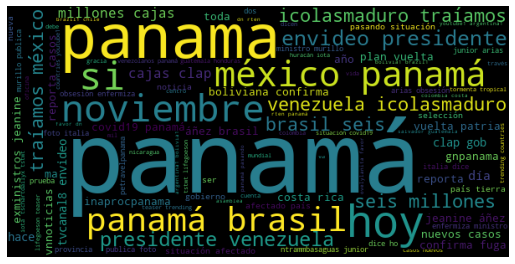

In [ ]:
#Wordcloud
from wordcloud import WordCloud
import matplotlib.pylab as plt
allwords = ' '.join([twts for twts in tweetsCleaned_es['cleanedTweet'] ])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119,max_words=100).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Resutados:**

Podemos observar en el Wordcloud, que la palabra que más se repite es Panamá, y no observamos stop-words. Textos claros de Palabaras concretas que representan alguna importancia en los textos, cualquiera que sea el tema.

In [ ]:
# Vamos a ver las 50 palabras más utilizadas en este dataset con tweets en español
all_words_counter_es = list(itertools.chain(*cleanWordsList_es))
# Create counter
commonWordCount_es = collections.Counter(all_words_counter_es)
print(commonWordCount_es.most_common(50))

[('panamá', 529), ('panama', 103), ('casos', 68), ('covid19', 59), ('brasil', 58), ('méxico', 51), ('millones', 51), ('país', 50), ('venezuela', 47), ('presidente', 41), ('si', 40), ('hoy', 40), ('nuevos', 39), ('iota', 37), ('colombia', 36), ('reporta', 33), ('noviembre', 33), ('seis', 30), ('clap', 30), ('cajas', 29), ('envideo', 28), ('icolasmaduro', 28), ('traíamos', 28), ('chile', 27), ('tvcanal8', 27), ('situación', 27), ('así', 27), ('honduras', 27), ('guatemala', 26), ('vuelta', 25), ('inaprocpanama', 25), ('costa', 25), ('alerta', 25), ('gob', 23), ('tierras', 23), ('venezolanos', 22), ('chiriquí', 22), ('hace', 22), ('gnpanama', 22), ('huracán', 22), ('tstwt', 22), ('argentina', 21), ('pasando', 20), ('favor', 20), ('murillo', 20), ('personas', 20), ('día', 20), ('nacional', 20), ('patria', 19), ('residenciapma', 19)]


In [ ]:
#Creando DataFrame para luego graficar las 50 palabras que más se utilizarón
final_word_count_es = pd.DataFrame(commonWordCount_es.most_common(50),
                             columns=['palabras', 'conteo'])


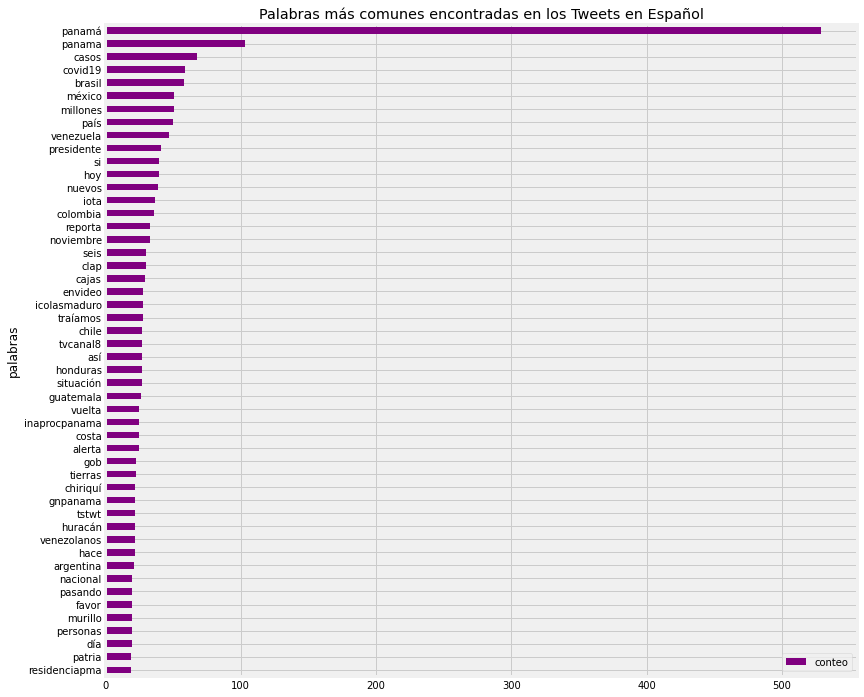

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

#Plot para ver conteo de palabras más utilizadas en textos en español
final_word_count_es.sort_values(by='conteo').plot.barh(x='palabras',
                      y='conteo',
                      ax=ax,
                      color="purple")

ax.set_title("Palabras más comunes encontradas en los Tweets en Español")
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
#Utilizaremos nuevamente el algoritmo TF-Idf
tfidf_es = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 1000,
    stop_words = None
)
tfidf_es.fit(tweetsCleaned_es.cleanedTweet)
text_es = tfidf.transform(tweetsCleaned_es.cleanedTweet)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


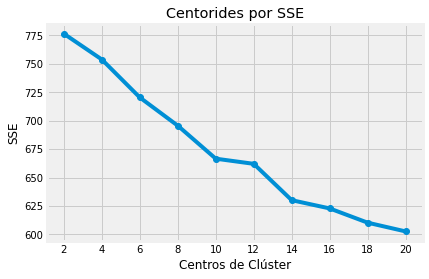

In [ ]:
find_optimal_clusters(text_es, 20)

In [ ]:
#Definamos un número d clusteres y reutilizemos la funciones de get_top_keywords para ver palabras claves para distintos grupos encontrados.
clusters_es = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=9).fit_predict(text_es)
get_top_keywords(text_es, clusters_es, tfidf_es.get_feature_names(), 50)


Cluster 0
covid,countries,costa,coronavirus,cortizo,demasiado,defunciones,dn,dominicana,domingo,conozca,distrito,duardoulloa12,droga,día,dicen,connacionales,dice,después,derrumbó,denuncian,días,dos,busquen,copa,mantenga,ojoaldato,migrantes,boliviana,así,tan,17,pm,partido,000,nicarag,primer,semana,habitantes,20112020el,is,acumulado,clap,necesita,14,2019,144477,san,010misterchip,nicaragua

Cluster 1
erdaddeeleazar,pertenece,ex,producción,confirma,selección,junior,pueden,aún,cierto,puente,colgar,caribe,moco,ho,acumulado,panama,sistema,medio,social,calidad,busquen,noche,derrumbó,nuevas,equipos,boliviana,20112020el,lota,mente,lifegoeson,ojoaldato,labores,17,alemania,cortizo,san,migrantes,14,así,sigamos,010misterchip,semana,15,144477,countries,1344,necesita,nicaragua,nicarag

Cluster 2
cuba,creo,cox3fupcvnfi,covid19,covid,countries,costa,darle,cortizo,copa,conviasa,convertirse,contribuciones,conozca,connacionales,conjunto,confirma,condiciones,comunidad,coronavirus,elevó,debe,defunciones,edu

## **RESULTADOS:**

De igual manera podemmos observar en este punto los terminos más utilizados por grupo para textos escritos en español.

## **ANÁLISIS DE SENTIMIENTO PARA TWEETS EN TEXTO ESPAÑOL**

Para esta seccion, utilizaremos la librería **sentiment_analysis_spanish** que nos otorga otorga la polaridad del texto, y otorgar resultados entre **[0 y 1 ]**.

puede encontrar la documentación en el siguiente enlace:
[sentiment-analysis-spanish](https://pypi.org/project/sentiment-analysis-spanish/)




In [ ]:
"""Instalarmos la librería a través de pip"""
!pip install sentiment-analysis-spanish

     |████████████████████████████████| 15.1MB 219kB/s 


In [ ]:
#Creando Funcion para extrarer la Polaridad para Textos en Español con ayuda de la libreria sentiment_analysis_spanish
from sentiment_analysis_spanish import sentiment_analysis
def spanish_sentiment(text):
  sentiment = sentiment_analysis.SentimentAnalysisSpanish()
  return sentiment.sentiment(text)

## **Muestra Representativa de la Población**

Una **muestra estadística** es un subconjunto de datos perteneciente a una población de datos. Estadísticamente hablando, debe estar constituido por un cierto número de observaciones que representen adecuadamente el total de los datos. [Muestra](https:https://economipedia.com/definiciones/muestra-estadistica.html)

En esta ocasión a diferencía de como analizamos los tweets en ingles que tomamos en cuenta todos los tweets de la data, en este caso utilizaremos una muestra representativa de los datos.

Extraeremos 10% de de tweets por fecha de creación.
ejemplo: 14 tweets del **2020-11-12**, 14 tweets **del 2020-11-2013** y así sucesivamente.

Los tweets fueron de esta manera para evitar sesgos por día, ya que pudiesen condicionar el sentimiento diario de los tweets.

Hemos elegido **2 muestras** representativas para compararlas al final.

In [ ]:
#Creamos un nuevo dataset para ir tomando las muestras del dataset original df_es que contiene todos los tweets en español
sample = df_es[['created_at','cleanedTweet']]
#Cambiando columna created_at a tipo de dato "datetime"
sample['created_at'] = pd.to_datetime(sample['created_at'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Creando una nueva columna con fecha sin hora minutos y segundos
sample['new_date_column'] = sample['created_at'].dt.date
sample['new_date_column'] = pd.to_datetime(sample['new_date_column'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## **Muestra Representativa uno**

In [ ]:
#Filtrando por fecha
mask_one = (sample['new_date_column'] == '2020-11-18') 
filtered_one=sample.loc[mask_one]

mask_two = (sample['new_date_column'] == '2020-11-17')
filtered_two=sample.loc[mask_two]

mask_three = (sample['new_date_column'] == '2020-11-16')
filtered_three=sample.loc[mask_three]

mask_four = (sample['new_date_column'] == '2020-11-15')
filtered_four=sample.loc[mask_four]

mask_five = (sample['new_date_column'] == '2020-11-16')
filtered_five=sample.loc[mask_five]

mask_six = (sample['new_date_column'] == '2020-11-14')
filtered_six=sample.loc[mask_six]

mask_seven = (sample['new_date_column'] == '2020-11-13')
filtered_seven=sample.loc[mask_seven]

mask_eight = (sample['new_date_column'] == '2020-11-12')
filtered_eight=sample.loc[mask_eight]

#filtrando por columna para obtener 14 tweets aleatorios por fecha
section_one = filtered_one.iloc[0:14] 
section_two = filtered_two.iloc[0:14]
section_three = filtered_three.iloc[0:14] 
section_four = filtered_four.iloc[0:14] 
section_five = filtered_five.iloc[0:14] 
section_six = filtered_six.iloc[0:14] 
section_seven = filtered_seven.iloc[0:14] 
section_eight = filtered_eight.iloc[0:14] 

In [ ]:
#Concatenando dataset para tener un dataset con muestra significativa de los tuits 
spanish_dataset = pd.concat([section_one,section_two,section_three,section_four,section_five,section_six,section_seven,section_eight,])

In [ ]:
#Aplicar la funcion para obtener la polatidad de los twets
spanish_dataset['Polarity'] = spanish_dataset['cleanedTweet'].apply(spanish_sentiment)

In [ ]:
#Creamos una función de polaridad entre 0 y 1 ya que nuestro modulo nos da resultados entre este rango (revisar documentación)
def getPolarity_es(polarity):
        if polarity >= 0 and polarity <=0.49:
            return "Negativo"
        elif polarity >=0.5 and polarity <=0.7 :
            return "Neutral"
        elif polarity > 0.7 and polarity <= 1:
            return "Positivo"
       

In [ ]:
#Aplicamos Get Polarity a la muestra significativa de tweets que hemos tomado
spanish_dataset['PolarityCheck'] = spanish_dataset['Polarity'].apply(getPolarity_es)
#Remover notacion cientifica
spanish_dataset['Polarity'] = spanish_dataset['Polarity'].apply(lambda x: '%.2f' % x)
#Contando Cada uno de los valores
polarityCheck_es = spanish_dataset['PolarityCheck'].value_counts()
#Transformando a Dataframe
polarityCheck_es = pd.DataFrame(polarityCheck_es)

In [ ]:
spanish_dataset.head()

,created_at,cleanedTweet,new_date_column,Polarity,PolarityCheck
0,2020-11-18 23:59:55+00:00,andeportes preocupados por el estado de salud ...,2020-11-18,0.01,Negativo
1,2020-11-18 23:59:50+00:00,strellaonline spanama realidad crítica el est...,2020-11-18,0.34,Negativo
2,2020-11-18 23:59:50+00:00,el sobresaliente desempeño de bac credimatic e...,2020-11-18,0.99,Positivo
3,2020-11-18 23:59:45+00:00,sdemontero migrantes venezolanos por ciudad ...,2020-11-18,0.00,Negativo
4,2020-11-18 23:59:39+00:00,tvcanal8 envideo presidente de venezuela icol...,2020-11-18,0.36,Negativo


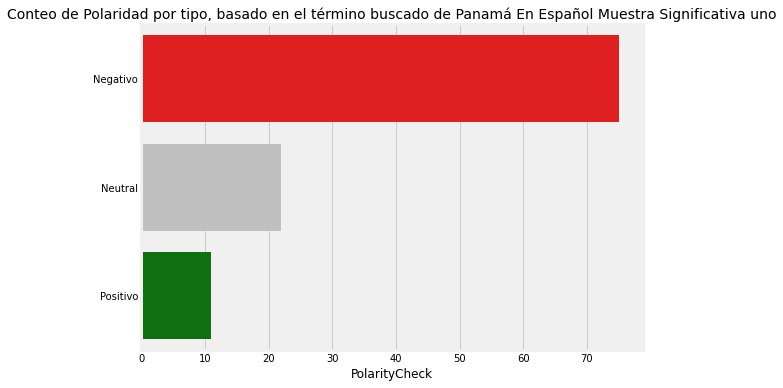

In [ ]:
#Vemos conteo de Tweets por Polaridad para la primera muestra
plt.figure(figsize=(8,6))
color_es = ['red','silver','green']
plt.title(f'Conteo de Polaridad por tipo, basado en el término buscado de {term} En Español Muestra Significativa uno', fontsize=14)
sns.barplot(data=polarityCheck_es,x='PolarityCheck', y=polarityCheck_es.index, palette=color_es)

### **Muestra Representativa Dos**

In [ ]:
#filtrando por columna para obtener 14 tweets aleatorios por fecha
section_oneB = filtered_one.iloc[112:126] 
section_twoB = filtered_two.iloc[112:126]
section_threeB = filtered_three.iloc[112:126] 
section_fourB = filtered_four.iloc[112:126] 
section_fiveB = filtered_five.iloc[112:126] 
section_sixB = filtered_six.iloc[112:126] 
section_sevenB = filtered_seven.iloc[112:126] 
section_eightB = filtered_eight.iloc[112:126] 

In [ ]:
#Concatenando dataset para tener un dataset con muestra significativa de los tuits 
spanish_datasetB = pd.concat([section_oneB,section_twoB,section_threeB,section_fourB,section_fiveB,section_sixB,section_sevenB,section_eightB])

In [ ]:
#Aplicar la funcion para obtener la polatidad de los twets
spanish_datasetB['Polarity'] = spanish_datasetB['cleanedTweet'].apply(spanish_sentiment)

In [ ]:
#Aplicamos Get Polarity a la muestra significativa de tweets que hemos tomado
spanish_datasetB['PolarityCheck'] = spanish_datasetB['Polarity'].apply(getPolarity_es)
#Remover notacion cientifica
spanish_datasetB['Polarity'] = spanish_datasetB['Polarity'].apply(lambda x: '%.2f' % x)
#Contando Cada uno de los valores
polarityCheck_esB = spanish_datasetB['PolarityCheck'].value_counts()
#Transformando a Dataframe
polarityCheck_esB = pd.DataFrame(polarityCheck_esB)

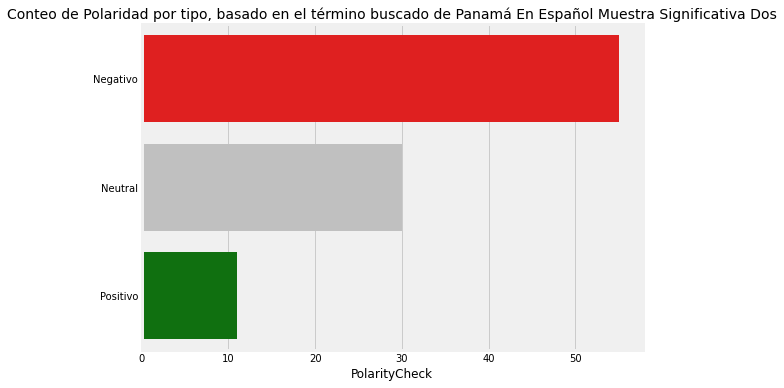

In [ ]:
#Conteo de  Polaridad para segunda muestra representativa
plt.figure(figsize=(8,6))
color = ['red','silver','green']
plt.title(f'Conteo de Polaridad por tipo, basado en el término buscado de {term} En Español Muestra Significativa Dos', fontsize=14)
sns.barplot(data=polarityCheck_esB,x='PolarityCheck', y=polarityCheck_esB.index, palette=color)

## **Comparación de porcentajes de sentimientos para ambas muestras significativas**

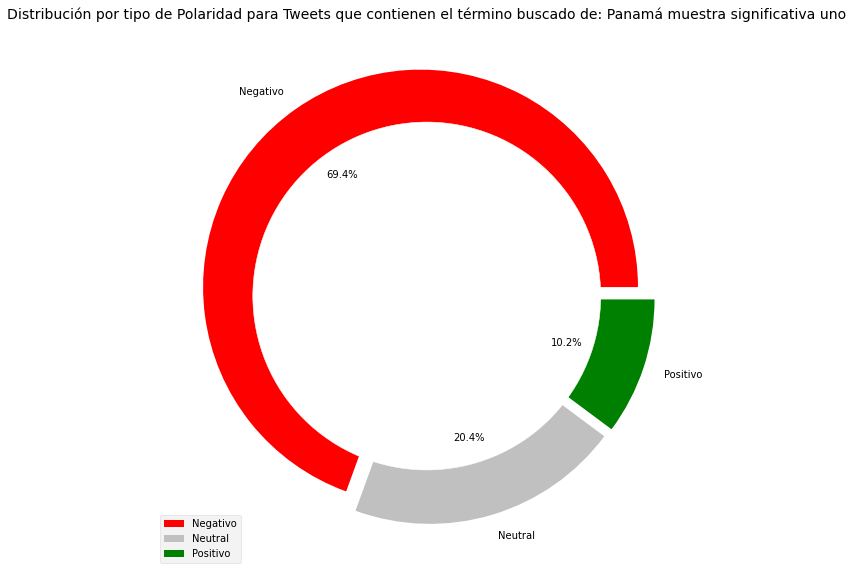

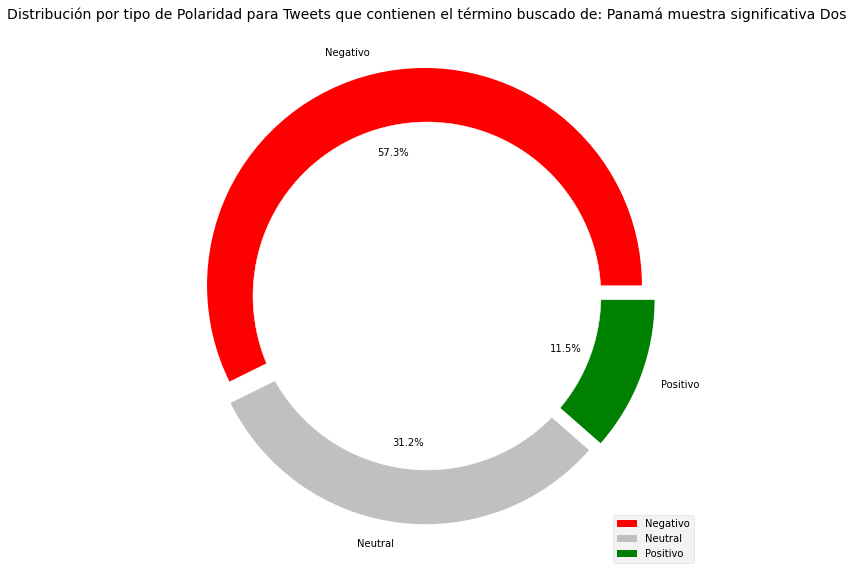

In [ ]:
modified_es = polarityCheck_es.reset_index()
modified_es.columns = ['Polarity','ValueCount']
#groupby the data by delivery type
data_es = modified_es.groupby("Polarity")['ValueCount'].sum()
#Using matplotlib
pie_es ,ax = plt.subplots(figsize=[20,10])
labels_es = data_es.keys()
colors = ['red','silver','green']
explode_es = [0.05, 0.05,0.05]
plt.pie(x=data_es, autopct="%.1f%%", explode=explode_es, labels=labels_es, pctdistance=0.63,colors=colors)
plt.title(f'Distribución por tipo de Polaridad para Tweets que contienen el término buscado de: {term} muestra significativa uno' , fontsize=14);
my_circle_es = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle_es)
plt.legend()
plt.show()

modified_esB = polarityCheck_esB.reset_index()
modified_esB.columns = ['Polarity','ValueCount']
#groupby the data by delivery type
data_esB = modified_esB.groupby("Polarity")['ValueCount'].sum()
#Using matplotlib
pie_esB ,ax = plt.subplots(figsize=[20,10])
labels_esB = data_esB.keys()
colors = ['red','silver','green']
explode_esB = [0.05, 0.05,0.05]
plt.pie(x=data_esB, autopct="%.1f%%", explode=explode_esB, labels=labels_esB, pctdistance=0.63,colors=colors)
plt.title(f'Distribución por tipo de Polaridad para Tweets que contienen el término buscado de: {term} muestra significativa Dos' , fontsize=14);
my_circle_esB = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle_esB)
plt.legend()
plt.show()

## **Resultados para ambas muestras representativas**

Se observa que el procentaje de distribución de polaridad negativa, neutral y positiva para ambas muestras es bastante similiar, por lo que podemos deducir que nuestra muestras tomadas aleatoriamente sin sesgos nos dan un resultado bastante acertado.

En el caso de los tweets en idioma Español se percibe una negatividad que ronda el 60%, mientras que el sesgo neutral se encuentra en segundo lugar entre un rango de 20-30% y el porcentaje restante se lo adjudicaría el sesgo positivo, que sería el menor.

## **RESULTADOS GENERALES DEL ANÁLISIS DE SENTIMIENTO PARA TWEETS EN INGLÉS Y EN ESPAÑOL**

La idea principal de nuestro enfoque era realizar un análisis de sentimiento en donde se extrayeran textos relacionados a la palabra "Panamá"

Pero para hacerlo más completo realizamos el análisis para tweets en dos idiomas distinos, el inglés y el español para ver que tipo de contenido comparten, y cúal es la percepción de los usuarios al momento de escribir algun corpus que contenga la palabra de Panamá.

Parte del challenge era realizar un webscrapper y hemos analizado distitnas aristas cómo:


*   Análisis por idioma
*   Términos más utilizados en textos por idioma
*   Término relacionados a a tweets positivos y negativos.
*   Identificación de temas por idioma.
*   Agrupación de terminos por Clústeres (grupos).
*   Modelo predictivo (redes neuronales recurrentes).
*   Distribución de tweets por sentimiento.

Entre otros análisis complementarios.

Al final para el análisis de sentimientos identificamos algunos aspectos como:


*   Sentimientos con polaridad positiva mayor para tweets en inglés
*   Sentimientos con polaridad negativa mayor para tweets en español

Esto sintetisando rápidamente el análisis realizado para ambos datos (inglés y español)










Luego de haber extraido todos insights (ideas,percepiones) posibles de nuestros dos data.

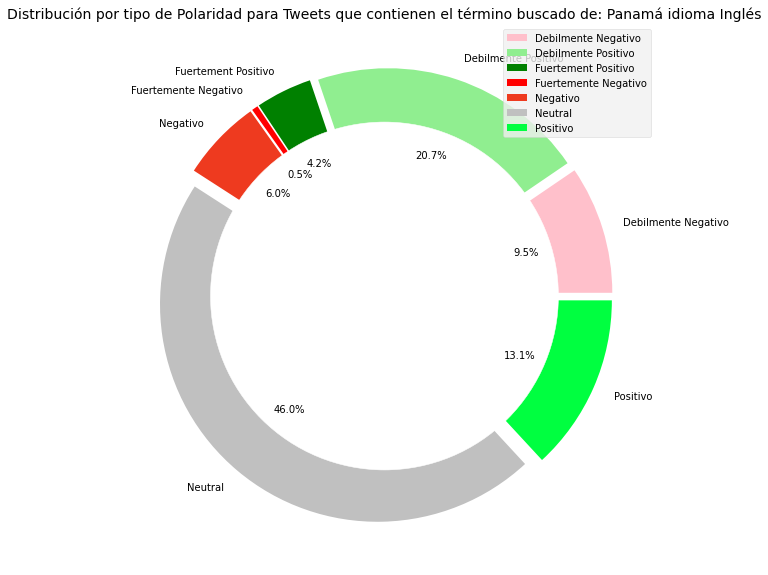

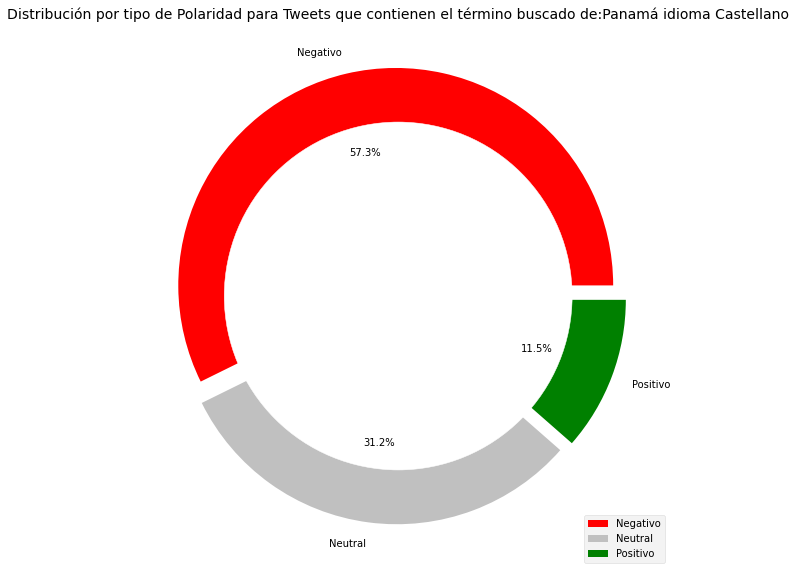

In [ ]:
modified = PolarityCheck.reset_index()
modified.columns = ['Polarity','ValueCount']
#groupby the data by delivery type
data = modified.groupby("Polarity")['ValueCount'].sum()
#Using matplotlib
pie, ax = plt.subplots(figsize=[20,10])
labels = data.keys()
colors = ['pink','lightgreen','green','red','#ee3a1f','silver','#00FF40']
explode = [0.05, 0.05,0.05,0.05,0.05,0.05,0.05]
plt.pie(x=data, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.63,colors=colors)
plt.title(f"Distribución por tipo de Polaridad para Tweets que contienen el término buscado de: {term} idioma Inglés" ,fontsize=14);
my_circle = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

modified_esB = polarityCheck_esB.reset_index()
modified_esB.columns = ['Polarity','ValueCount']
#groupby the data by delivery type
data_esB = modified_esB.groupby("Polarity")['ValueCount'].sum()
#Using matplotlib
pie_esB ,ax = plt.subplots(figsize=[20,10])
labels_esB = data_esB.keys()
colors = ['red','silver','green']
explode_esB = [0.05, 0.05,0.05]
plt.pie(x=data_esB, autopct="%.1f%%", explode=explode_esB, labels=labels_esB, pctdistance=0.63,colors=colors)
plt.title(f'Distribución por tipo de Polaridad para Tweets que contienen el término buscado de:{term} idioma Castellano' , fontsize=14);
my_circle_esB = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle_esB)
plt.legend()
plt.show()